<a href="https://colab.research.google.com/github/sbylash/23_Shasia-Sasa_PCVK/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TUGAS PRAKTIKUM (INDIVIDU)**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

1. Buat Gamma Correction

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


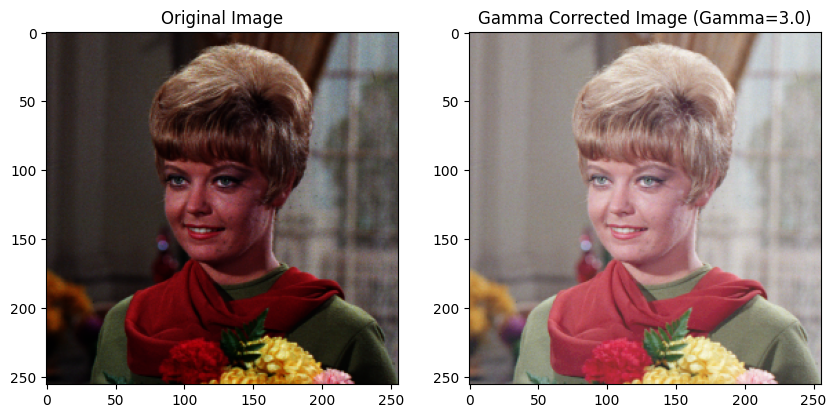

In [3]:
def gamma_correction(image, gamma_value):
    invGamma = 1.0 / gamma_value
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv.LUT(image, table)

image = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff')

# Menampilkan input untuk nilai Gamma
print(' Gamma Correction pada citra ')
print('----------------------------------')

try:
    gamma = float(input('Masukkan nilai Gamma: '))

    # Melakukan koreksi gamma pada citra
    corrected_image = gamma_correction(image, gamma)

    # Menampilkan hasil sebelum dan sesudah koreksi gamma
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))

    plt.subplot(1, 2, 2)
    plt.title(f'Gamma Corrected Image (Gamma={gamma})')
    plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB))

    plt.show()

except ValueError:
    print('Error, not a number')

2. Buat Simulasi Image Depth

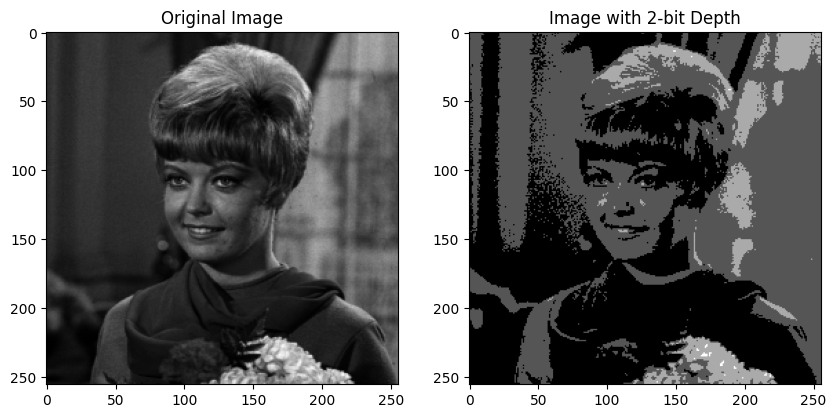

In [4]:
bit_depth = 2
level = 255 / (pow(2, bit_depth) - 1)

original = cv.imread('/content/drive/MyDrive/Week2/Images/female.tiff', cv.IMREAD_GRAYSCALE)

depth_image = np.zeros(original.shape, original.dtype)

for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        depth_image[i, j] = round(original[i, j] / level) * level

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(original, cmap='gray')

plt.subplot(1, 2, 2)
plt.title(f'Image with {bit_depth}-bit Depth')
plt.imshow(depth_image, cmap='gray')

plt.show()

3. Buat modul Average Denoising

Average Citra =  5
Nilai PSNR :  19.537011503839953  dB


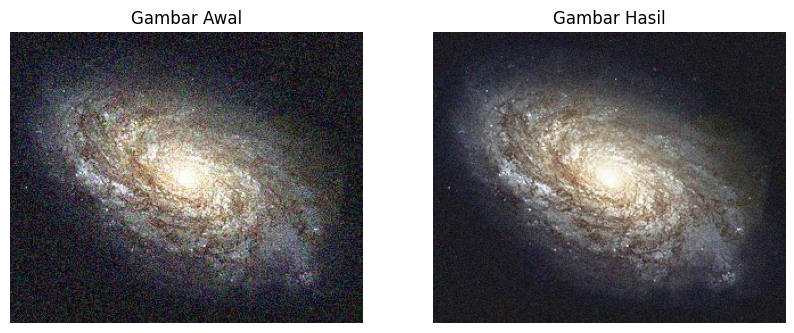

In [9]:
import math

def PSNR(img1, img2):
  mse = np.mean((img1-img2)**2)
  if(mse==0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

import glob

# Average Citra =  5

original_img = cv.imread('/content/drive/MyDrive/Week2/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Week2/Images/noises/*'):
  n = cv.imread(img)
  cv_img.append(n)

denoise_img = np.zeros(cv_img[0].shape)
jumlahGambar = 5
for i in range(jumlahGambar):
  denoise_img = denoise_img + cv_img[i]
denoise_img = np.uint16(denoise_img/jumlahGambar)

psnr = PSNR(original_img, denoise_img)

print('Average Citra = ', jumlahGambar)
print('Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoise_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Hasil')
plt.axis('off')

plt.show()

Average Citra =  10
Nilai PSNR :  19.7277900462252  dB


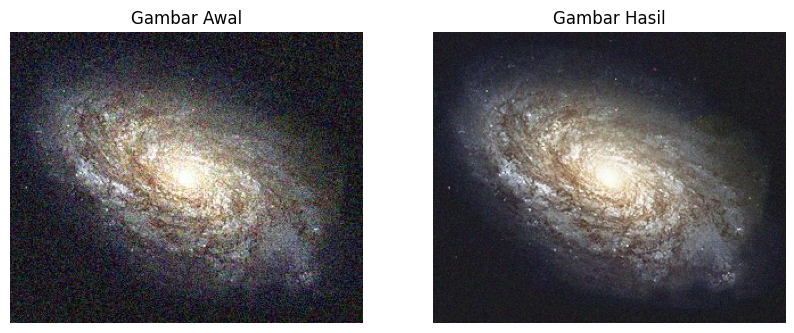

In [10]:
# Average Citra =  10

original_img = cv.imread('/content/drive/MyDrive/Week2/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Week2/Images/noises/*'):
  n = cv.imread(img)
  cv_img.append(n)

denoise_img = np.zeros(cv_img[0].shape)
jumlahGambar = 10
for i in range(jumlahGambar):
  denoise_img = denoise_img + cv_img[i]
denoise_img = np.uint16(denoise_img/jumlahGambar)

psnr = PSNR(original_img, denoise_img)

print('Average Citra = ', jumlahGambar)
print('Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoise_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Hasil')
plt.axis('off')

plt.show()

Average Citra =  20
Nilai PSNR :  19.83682282780941  dB


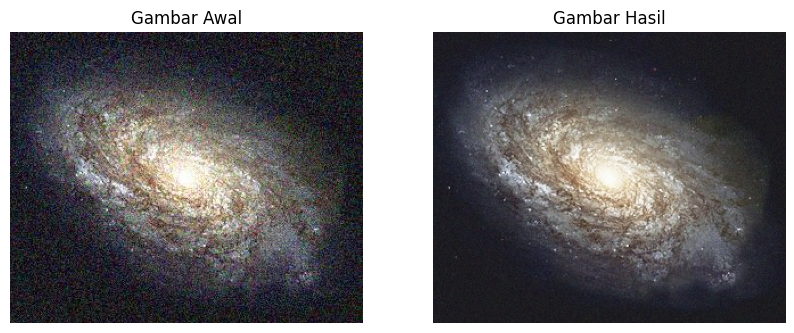

In [11]:
# # Average Citra =  20

original_img = cv.imread('/content/drive/MyDrive/Week2/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Week2/Images/noises/*'):
  n = cv.imread(img)
  cv_img.append(n)

denoise_img = np.zeros(cv_img[0].shape)
jumlahGambar = 20
for i in range(jumlahGambar):
  denoise_img = denoise_img + cv_img[i]
denoise_img = np.uint16(denoise_img/jumlahGambar)

psnr = PSNR(original_img, denoise_img)

print('Average Citra = ', jumlahGambar)
print('Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoise_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Hasil')
plt.axis('off')

plt.show()

Average Citra =  40
Nilai PSNR :  19.890836043124555  dB


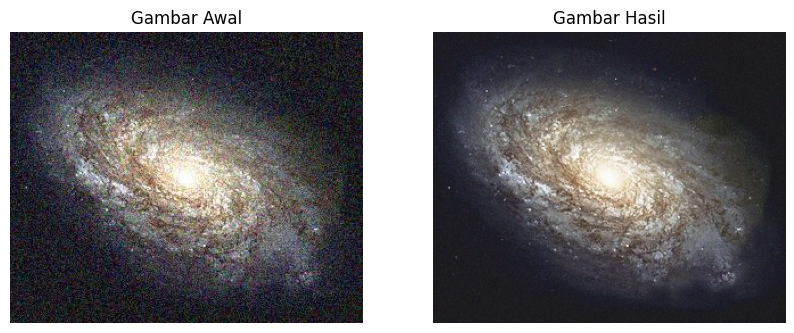

In [12]:
# # Average Citra =  40

original_img = cv.imread('/content/drive/MyDrive/Week2/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Week2/Images/noises/*'):
  n = cv.imread(img)
  cv_img.append(n)

denoise_img = np.zeros(cv_img[0].shape)
jumlahGambar = 40
for i in range(jumlahGambar):
  denoise_img = denoise_img + cv_img[i]
denoise_img = np.uint16(denoise_img/jumlahGambar)

psnr = PSNR(original_img, denoise_img)

print('Average Citra = ', jumlahGambar)
print('Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoise_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Hasil')
plt.axis('off')

plt.show()

Failed to load image: /content/drive/MyDrive/Week2/Images/noises/Thumbs.db
Average Citra =  80
Nilai PSNR :  19.918606976254814  dB


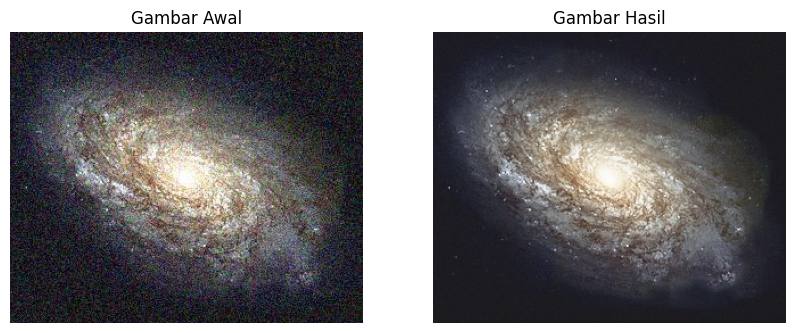

In [15]:
# # Average Citra =  80

original_img = cv.imread('/content/drive/MyDrive/Week2/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Week2/Images/noises/*'):
  n = cv.imread(img)
  if n is not None:
    cv_img.append(n)
  else:
    print(f"Failed to load image: {img}")

denoise_img = np.zeros(cv_img[0].shape)
jumlahGambar = 80
for i in range(min(jumlahGambar, len(cv_img))):
  denoise_img = denoise_img + cv_img[i]
denoise_img = np.uint16(denoise_img/jumlahGambar)

psnr = PSNR(original_img, denoise_img)

print('Average Citra = ', jumlahGambar)
print('Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoise_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Hasil')
plt.axis('off')

plt.show()

Failed to load image: /content/drive/MyDrive/Week2/Images/noises/Thumbs.db
Average Citra =  100
Nilai PSNR :  19.92196095594035  dB


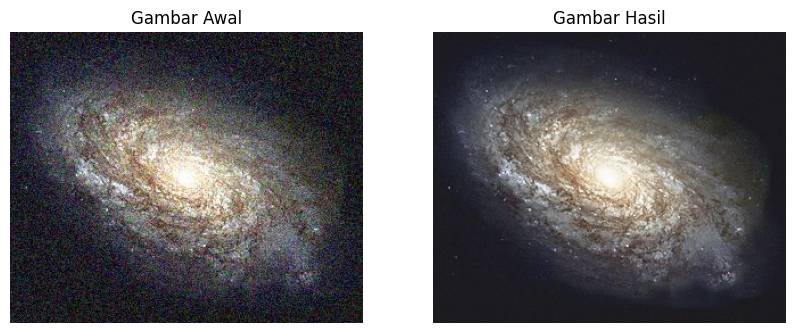

In [16]:
# # Average Citra =  100

original_img = cv.imread('/content/drive/MyDrive/Week2/Images/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/Week2/Images/noises/*'):
  n = cv.imread(img)
  if n is not None:
    cv_img.append(n)
  else:
    print(f"Failed to load image: {img}")

denoise_img = np.zeros(cv_img[0].shape)
jumlahGambar = 100
for i in range(min(jumlahGambar, len(cv_img))):
  denoise_img = denoise_img + cv_img[i]
denoise_img = np.uint16(denoise_img/jumlahGambar)

psnr = PSNR(original_img, denoise_img)

print('Average Citra = ', jumlahGambar)
print('Nilai PSNR : ', psnr, ' dB')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cv_img[0], cv.COLOR_BGR2RGB))
plt.title('Gambar Awal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(denoise_img, cv.COLOR_BGR2RGB))
plt.title('Gambar Hasil')
plt.axis('off')

plt.show()

Kesimpulan: Semakin besar jumlah average citra, maka gambar semakin halus (tidak ada noise) dan nilai PSNR juga semakin tinggi.

4. Buat Image Masking

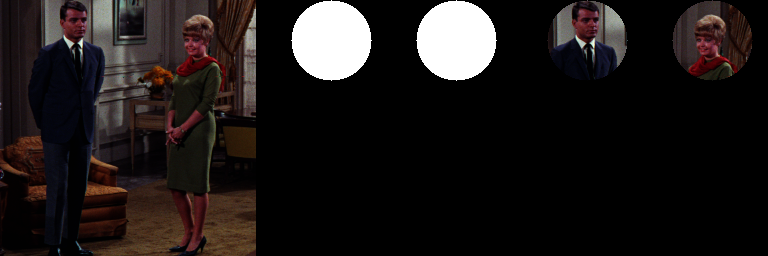

In [31]:
from google.colab.patches import cv2_imshow

# AND

img = cv.imread('/content/drive/MyDrive/Week2/Images/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 40), 40, (255, 255, 255), -5)

masked = img & mask

final_frame = np.hstack((img, mask, masked))
cv2_imshow(final_frame)

5. Lakukan Percobaan Menggunakan Operator Lain

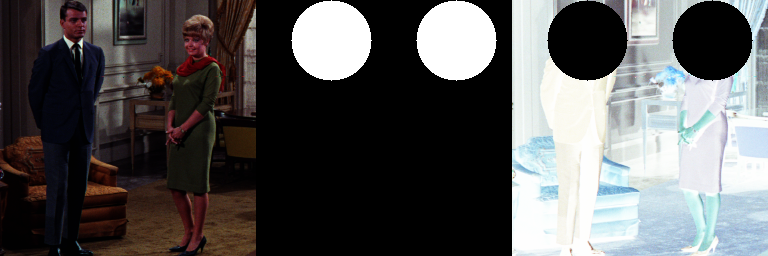

In [32]:
# NOT

img = cv.imread('/content/drive/MyDrive/Week2/Images/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 40), 40, (255, 255, 255), -5)

masked = ~img & ~mask

final_frame = np.hstack((img, mask, masked))
cv2_imshow(final_frame)

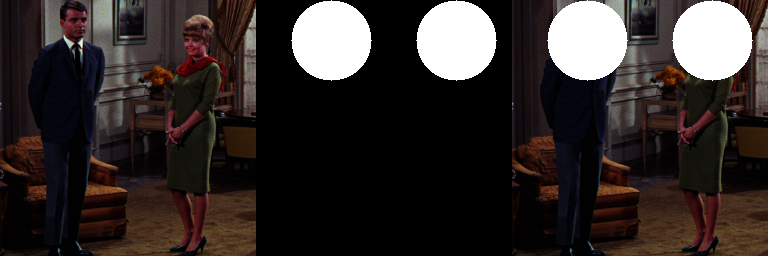

In [33]:
# OR

from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/Week2/Images/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 40), 40, (255, 255, 255), -5)

masked = img | mask

final_frame = np.hstack((img, mask, masked))
cv2_imshow(final_frame)

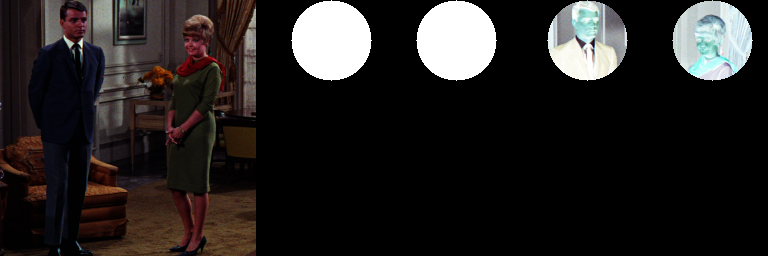

In [34]:
# NAND

from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/Week2/Images/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 40), 40, (255, 255, 255), -5)

masked = ~img & mask

final_frame = np.hstack((img, mask, masked))
cv2_imshow(final_frame)

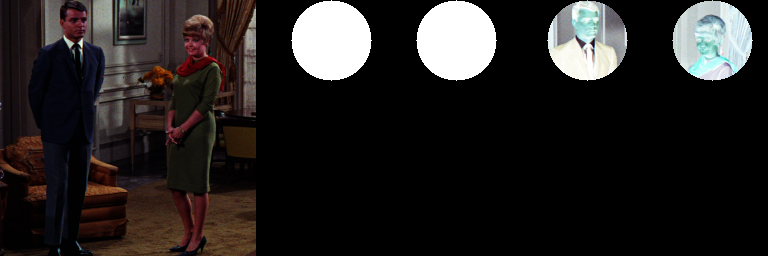

In [35]:
# XOR

from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/Week2/Images/couple.tiff')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (75, 40), 40, (255, 255, 255), -1)
mask = cv.circle(mask, (200, 40), 40, (255, 255, 255), -5)

result = cv.bitwise_xor(img, mask)

final_frame = np.hstack((img, mask, masked))
cv2_imshow(final_frame)

**TUGAS KELOMPOK**

Anggota:
1. Amanda Vanika Putri (3)
2. Halur Muhammad Abiyyu (13)
3. Shasia Sasa Salsabyla (23)

In [36]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

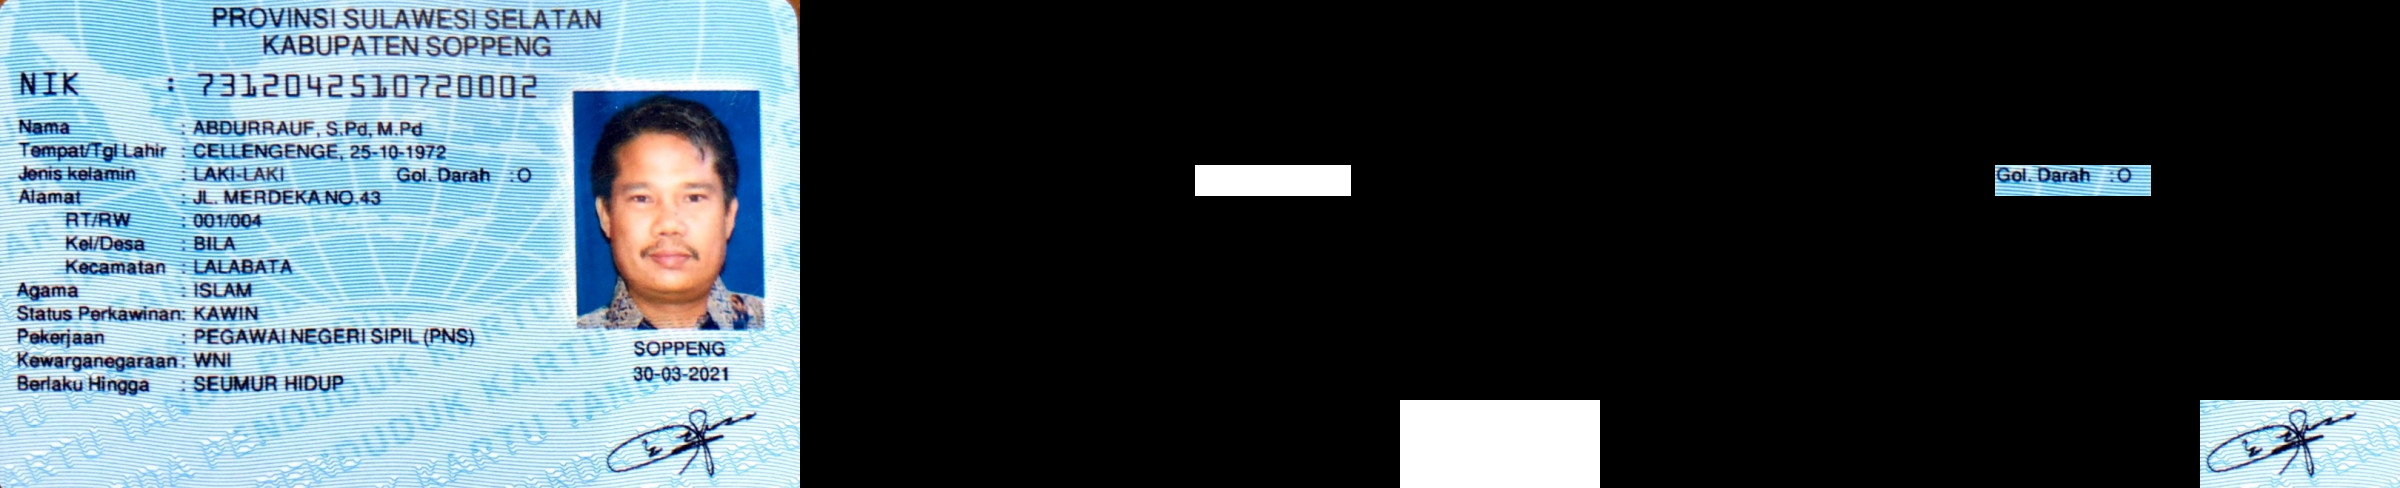

In [38]:
e_ktp = cv.imread('/content/drive/MyDrive/KTP_PCVK.jpg')

mask = np.zeros(e_ktp.shape, dtype = "uint8")
pt1_goldar = (395, 165)
pt2_goldar = (550, 195)

pt1_TTD = (600, 400)
pt2_TTD = (800, 488)

cv.rectangle(mask, pt1=pt1_goldar, pt2=pt2_goldar, color=(255, 255, 255), thickness=cv.FILLED)
cv.rectangle(mask, pt1=pt1_TTD, pt2=pt2_TTD, color=(255, 255, 255), thickness=cv.FILLED)

masked_img = cv.bitwise_and(e_ktp, mask)

frame = cv.hconcat((e_ktp, mask, masked_img))
cv2_imshow(frame)